In [2]:
import ctypes
import os
import numpy as np

import plotly
#import plotly.plotly as py
import plotly.graph_objs as go
#from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#from plotly.graph_objs import *
#init_notebook_mode()
init_notebook_mode(connected=True)


import matplotlib.pyplot as plt
import scipy.integrate as integrate

simulator = ctypes.CDLL(os.path.abspath('ori.so'))
simulator.cell_parameters.restype = ctypes.c_int

In [3]:
##### the probability density function of the age distribution of an exponentially growing population of cells ####

In [4]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [5]:
###### user defined scipy PDF of the age PDF ####
import scipy.stats as st

class ageDist_pdf(st.rv_continuous):
    def _pdf(self,x):
        return 2.0*np.log(2.0)*np.exp(-x*np.log(2))  # Normalized over its range, in this case [0,1]

my_cv = ageDist_pdf(a=0, b=1, name='ageDist_pdf')

In [71]:
my_cv.mean() # this is the mean value of the WE ASSUME THAT THE MEAN APPLIES

0.44269504088896355

In [72]:
my_cv.median()

0.41503749927884465

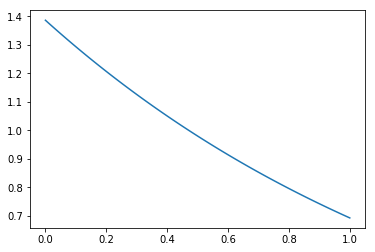

In [6]:
plt.plot(np.arange(0.0,1.01,0.01), [ageDistFunc(i) for i in np.arange(0.0,1.01,0.01)])

In [23]:
x = list(np.arange(0.0,1.01,0.01))
x.append(1.0)
x.insert(0, 0.0)
y = [ageDistFunc(i) for i in np.arange(0.0,1.01,0.01)]
y.append(0.0)
y.insert(0, 0.0)
trace = go.Scatter(
    name='Measurement',
    x=x,
    y=y,
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tozerox'
)

# Trace order can be important
# with continuous error bars
data = [trace]

layout = go.Layout(
    xaxis=dict(title='Cell Age', zeroline=False, range=[-0.1, 1.1]),
    yaxis=dict(title='Probability Density', zeroline=True),
    title='Population Exponentially Growing Age Distribution',
    showlegend = False,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='pandas-continuous-error-bars')

In [24]:
plotly.io.write_image(fig, 'age_distribution.png' , width=1200, height=800)

In [ ]:
##### the probability of the age distribution of an exponentially growing population ####

In [28]:
I = integrate.quad(ageDistFunc, 0.1, 0.2)

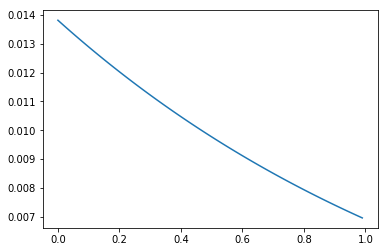

In [39]:
x = np.arange(0.0,1.0,0.01)
y = [integrate.quad(ageDistFunc, i, i+0.01)[0] for i in x]
plt.plot(x, y)

In [40]:
sum(y)

1.0000000000000002

In [ ]:
####### cell cycle parameter #######

In [13]:
age_weight = {}
for i in np.arange(0.0,1.01,0.01):
    age_weight[i] = ageDistFunc(i)

In [4]:
tau = 60.0
C = 40.0
D = 20.0
distRes = {}
for i in [i for i in np.arange(0.0,1.01,0.01)]:
    results = (ctypes.c_double*6)()
    status = simulator.cell_parameters(ctypes.c_double(tau), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
    results = [i for i in results]
    distRes[i] = {}
    distRes[i]['volume'] = results[0]
    distRes[i]['G0'] = results[1]
    distRes[i]['Ga'] = results[2]
    distRes[i]['segregation_timer'] = results[3]
    distRes[i]['oriC'] = results[4]
    distRes[i]['terC'] = results[5]
    results = None

In [5]:
distRes

{0.0: {'volume': 1.0,
  'G0': 1.0,
  'Ga': 1.0,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.01: {'volume': 1.0069555500567189,
  'G0': 1.0,
  'Ga': 1.015,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.02: {'volume': 1.013959479790029,
  'G0': 1.0,
  'Ga': 1.03,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.03: {'volume': 1.0210121257071934,
  'G0': 1.0,
  'Ga': 1.045,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.04: {'volume': 1.0281138266560665,
  'G0': 1.0,
  'Ga': 1.06,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.05: {'volume': 1.0352649238413776,
  'G0': 1.0,
  'Ga': 1.075,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.06: {'volume': 1.0424657608411214,
  'G0': 1.0,
  'Ga': 1.09,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.07: {'volume': 1.0497166836230674,
  'G0': 1.0,
  'Ga': 1.105,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0},
 0.08: {'volume': 1.05

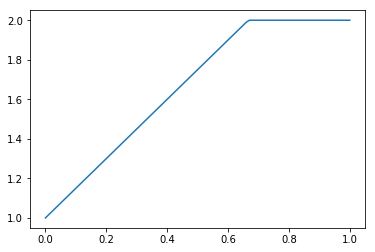

In [6]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['Ga'] for i in sorted([i for i in distRes])])

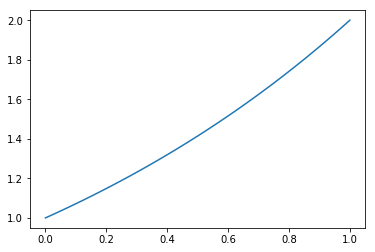

In [7]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['volume'] for i in sorted([i for i in distRes])])

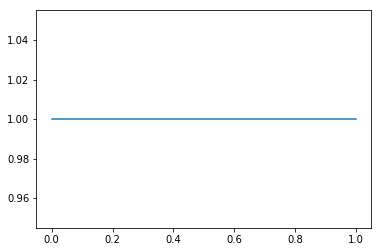

In [8]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['G0'] for i in sorted([i for i in distRes])])

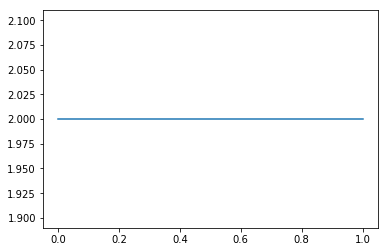

In [9]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['oriC'] for i in sorted([i for i in distRes])])

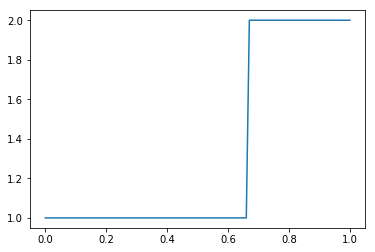

In [10]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['terC'] for i in sorted([i for i in distRes])])

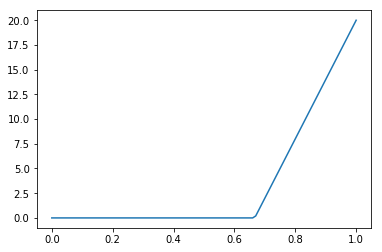

In [11]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['segregation_timer'] for i in sorted([i for i in distRes])])

In [41]:
##### Volkmer et al. ####
def gr_cellConc(gr_h):
    #cell_volume --> fL
    cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #cell_concentration --> mL**-1 * OD**-1
    population_cell_concentration = (3.6*10.0**9.0)/cell_volume
    return population_cell_concentration

In [43]:
gr_cellConc(0.5)

1337047353.7604458

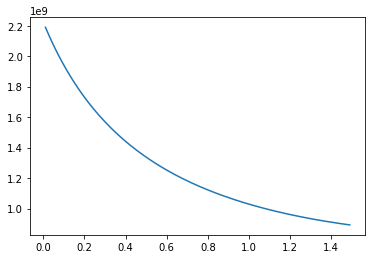

In [48]:
plt.plot([i for i in np.arange(0.01, 1.5, 0.01)], [gr_cellConc(i) for i in np.arange(0.01, 1.5, 0.01)])

In [47]:
###### calculate the real volume distribution of a population of cells #####
#Note to change between hourly and min growth rate --> a = b/np.log(2)

In [88]:
#total cell volume = 3.6 uL*OD-1*mL-1

gr_h = 0.5
C = 40.0
D = 20.0

#1) calculate the average cell age
mean_cell_age = 0.44269504088896355
#2) calculate the (measured) mean cell volume
measured_cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
#3) calculate 
results = (ctypes.c_double*6)()
status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
results = [i for i in results]
theoretical_cell_volume = results[0]
theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume

In [90]:
for i in distRes:
    distRes[i]['physical_volume'] = theoretical_cell_volume_adjustment*distRes[i]['volume']

In [91]:
distRes

{0.0: {'volume': 1.0,
  'G0': 1.0,
  'Ga': 1.0,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.4161271188800432},
 0.01: {'volume': 1.0069555500567189,
  'G0': 1.0,
  'Ga': 1.015,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.41902151188537157},
 0.02: {'volume': 1.013959479790029,
  'G0': 1.0,
  'Ga': 1.03,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.42193603698613225},
 0.03: {'volume': 1.0210121257071934,
  'G0': 1.0,
  'Ga': 1.045,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.4248708342121229},
 0.04: {'volume': 1.0281138266560665,
  'G0': 1.0,
  'Ga': 1.06,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.42782604456712514},
 0.05: {'volume': 1.0352649238413776,
  'G0': 1.0,
  'Ga': 1.075,
  'segregation_timer': 0.0,
  'oriC': 2.0,
  'terC': 1.0,
  'physical_volume': 0.4308018100356798},
 0.06: {'volume': 1.04

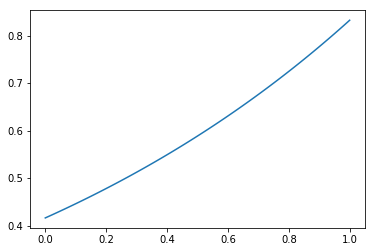

In [92]:
plt.plot(sorted([i for i in distRes]), [distRes[i]['physical_volume'] for i in sorted([i for i in distRes])])

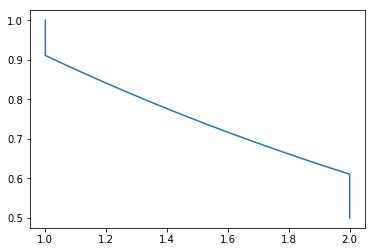

In [180]:
#plt.plot(Ga, [(i/max(weights))*100.0 for i in weights])
plt.plot(Ga, [i/max(weights) for i in weights])

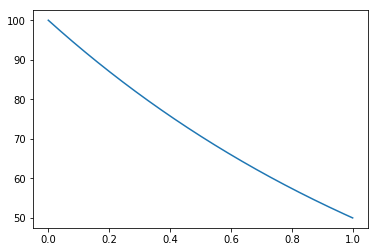

In [250]:
plt.plot(age_array, [(i/max(weights))*100.0 for i in weights])

In [ ]:
#### need to plot the histogram of cell number distributions ####

In [2]:
##### trying to use the mean population adjusted cell volume to calculate cell count
gr_h = 0.6931471805599453
C = 40.0
D = 20.0
def popCellCount_meanPop(gr_h, C=40.0, D=20.0):
    #1) calculate the average cell age
    mean_cell_age = 0.44269504088896355
    #2) calculate the (measured) mean cell volume
    measured_mean_cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    print('################ GR '+str(gr_h)+' ########## ('+str((np.log(2)/gr_h)*60.0)+') #####')
    print('Measured mean cell volume: '+str(measured_mean_cell_volume))
    #3) calculate 
    #results = (ctypes.c_double*6)()
    #status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    #results = [i for i in results]
    #theoretical_cell_volume = results[0]
    #print('Theoretical Cell Volume: '+str(theoretical_cell_volume))
    #theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume
    #print('Cell Volume Adjustment: '+str(theoretical_cell_volume_adjustment))
    #### adjust for the different 
    age_array = np.arange(0.0, 1.0, 0.0001)
    weights = []
    for i in age_array:
        weights.append(integrate.quad(ageDistFunc, i, i+0.0001)[0])
    #### calculate the physical volume ###
    theoretical_cell_volume = []
    Ga = []
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        theoretical_cell_volume.append(results[0])
        Ga.append(results[2])

    print('Theoretical mean cell volume: '+str(np.mean(theoretical_cell_volume)))
    if measured_mean_cell_volume>=np.mean(theoretical_cell_volume):
        theoretical_cell_volume_adjustment = measured_mean_cell_volume/np.mean(theoretical_cell_volume)
    elif np.mean(theoretical_cell_volume)>measured_mean_cell_volume:
        theoretical_cell_volume_adjustment = measured_mean_cell_volume*np.mean(theoretical_cell_volume)
    print('Cell volume adjustment: '+str(theoretical_cell_volume_adjustment))   

    physical_cell_volume = [i*theoretical_cell_volume_adjustment for i in theoretical_cell_volume]

    print('Physical mean cell volume: '+str(np.mean(physical_cell_volume)))

    #cell_concentration --> mL**-1 * OD**-1
    #population_cell_concentration = (3.6*10.0**9.0)/measured_mean_cell_volume
    population_cell_concentration = (3.6*10.0**9.0)/np.mean(physical_cell_volume)
    print('Old: 8 * 10^8 * mL-1 * OD-1 ')
    print('New: '+str(population_cell_concentration/10.0**8.0)+' * 10^8 * mL-1 * OD-1')
    return population_cell_concentration

################ GR 0.1 ########## (415.8883083359671) #####
Measured mean cell volume: 1.8557000000000001
Theoretical mean cell volume: 0.7971846724674538
Cell volume adjustment: 2.327816958969142
Physical mean cell volume: 1.8557
Old: 8 * 10^8 * mL-1 * OD-1 
New: 19.39968744947998 * 10^8 * mL-1 * OD-1
################ GR 0.30000000000000004 ########## (138.62943611198904) #####
Measured mean cell volume: 2.2953
Theoretical mean cell volume: 0.9736835577147598
Cell volume adjustment: 2.357336715623586
Physical mean cell volume: 2.2953
Old: 8 * 10^8 * mL-1 * OD-1 
New: 15.684224284407264 * 10^8 * mL-1 * OD-1
################ GR 0.5000000000000001 ########## (83.17766166719342) #####
Measured mean cell volume: 2.6925000000000003
Theoretical mean cell volume: 1.1892597829680147
Cell volume adjustment: 2.2640133287618416
Physical mean cell volume: 2.6925
Old: 8 * 10^8 * mL-1 * OD-1 
New: 13.370473537604457 * 10^8 * mL-1 * OD-1
################ GR 0.7000000000000001 ########## (59.41261547

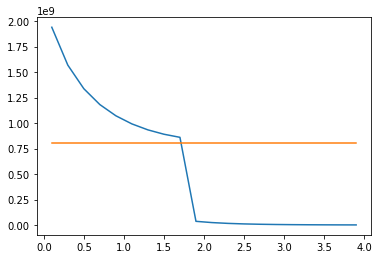

In [324]:
ageRange = np.arange(0.1, 4.0, 0.2)
plt.plot(ageRange, [popCellCount_meanPop(i) for i in ageRange])
plt.plot(ageRange, [8.0*10.0**8.0]*len(ageRange)) 

In [316]:
gr_h = 0.6931471805599453
popCellCount_meanPop(gr_h)

################ GR 0.6931471805599453 ########## (60.0) #####
Measured mean cell volume: 3.0358446077728214
Theoretical mean cell volume: 1.4426450414665861
Cell volume adjustment: 2.104360061215471
Physical mean cell volume: 3.035844607772821
Old: 8 * 10^8 * mL-1 * OD-1 
New: 11.858314456486818 * 10^8 * mL-1 * OD-1


1185831445.6486819

In [295]:
gr_h = 0.6931471805599453
print('GR hour: '+str(gr_h))
print('GR minutes: ')
print('Doubling time hours: '+str(np.log(2)/gr_h))
print('Doubling time minutes: '+str((np.log(2)/gr_h)*60.0))

GR hour: 0.6931471805599453
GR minutes: 
Doubling time hours: 1.0
Doubling time minutes: 60.0


In [313]:
def ch_volume(doubling_time_min, cell_age, C=40.0, D=20.0):
    return 2.0**((C+D+(cell_age*doubling_time_min))/doubling_time_min)-1.0

In [6]:
def popCellCount(gr_h, C=40.0, D=20.0):
    #gr_h = np.log(2.0)/(divRate_min/60.0)
    #gr_h = np.log(2.0)/(divRate_min/60.0)
    #gr_h = 2.2
    #C = 40.0
    #D = 20.0
    #1) calculate the average cell age
    mean_cell_age = 0.44269504088896355
    #Volkmer cell concentration
    #2) calculate the (measured) mean cell volume
    measured_cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #3) calculate 
    results = (ctypes.c_double*6)()
    status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    #status = simulator.cell_parameters(ctypes.c_double(divRate_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    results = [i for i in results]
    theoretical_cell_volume = results[0]
    theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume
    #### adjust for the different age 
    age_array = np.arange(0.0, 1.0, 0.0001)
    weights = []
    for i in age_array:
        weights.append(integrate.quad(ageDistFunc, i, i+0.0001)[0])
    #### calculate the physical volume ###
    physical_volume = []
    Ga = []
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double((np.log(2)/gr_h)*60.0), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        physical_volume.append(theoretical_cell_volume_adjustment*results[0])
        Ga.append(results[2])

    #cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #cell_concentration --> mL**-1 * OD**-1
    #change this to use the median or mean of the theoretical cell distribution (see if they are close)
    # and the std deviation 
    population_cell_concentration = (3.6*10.0**9.0)/measured_cell_volume 
    #print('Old: 8.0 * 10^8 * mL-1 * OD-1 ')
    #print('New: {0:.2f} * 10^8 * mL-1 * OD-1'.format(population_cell_concentration/10**8))
    return population_cell_concentration

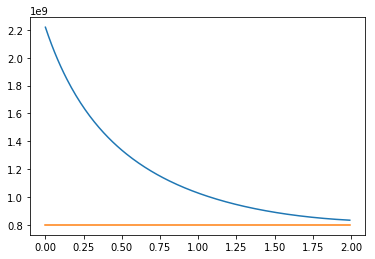

In [7]:
ageRange = np.arange(0.001, 2.0, 0.01)
plt.plot(ageRange, [popCellCount(i) for i in ageRange])
plt.plot(ageRange, [8.0*10.0**8.0]*len(ageRange)) 

In [8]:
trace = go.Scatter(
    name='Measurement',
    x=ageRange,
    y=[popCellCount(i) for i in ageRange],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'))

trace1 = go.Scatter(
    name='Measurement',
    x=ageRange,
    y=[8.0*10.0**8.0]*len(ageRange),
    mode='lines',
    line=dict(color='rgb(236, 171, 20)'))


# Trace order can be important
# with continuous error bars
data = [trace, trace1]

layout = go.Layout(
    xaxis=dict(title='Growth Rate (h<sup>-1</sup>)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Adjusted Theoretical Growth Rate Dependent Cell Concentration',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='pandas-continuous-error-bars')

In [9]:
plotly.io.write_image(fig, 'meanCellAge_cell_concentration.png' , width=1200, height=800)

In [ ]:
###### Fit data from thesis ####
#C = 44.98*(1.0+(5.206*np.exp(-4.917/tau_h)))
D = 62.8298142*np.exp(-213.585678*x)+25.5633968
C = 235.796165*np.exp(-428.916673*x)+45.2188479

In [28]:
results = (ctypes.c_double*6)()
status = simulator.cell_parameters(ctypes.c_double(60.0), ctypes.c_double(40.0), ctypes.c_double(20.0), ctypes.c_double(0.44269504088896355), results)
results = [i for i in results]
results[0]

1.3591409142295228

In [ ]:
######## Try with my own C and D values

In [68]:
def popCellCount(gr_min, age_array, weights, real_cell_volume=2.5873453927627095):
    #gr_h = np.log(2.0)/(divRate_min/60.0)
    #gr_h = np.log(2.0)/(divRate_min/60.0)
    #gr_h = 2.2
    #C = 40.0
    #D = 20.0
    ##### gr_h ######
    #gr_h = gr_h
    #dt_min = gr_h*60.0
    #gr_min = np.log(2.0)/dt_min
    #dt_h = np.log(2.0)/gr_h
    ##### dt_min ####
    #dt_min = dt_min
    #gr_min = np.log(2)/dt_min
    #dt_h = dt_min/60.0
    #gr_h = np.log(2)/dt_h
    ##### gr_min #####
    dt_min = np.log(2.0)/gr_min
    gr_min = gr_min
    dt_h = dt_min/60.0
    gr_h = np.log(2)/dt_h   
    #print('Doubling Time: '+str(dt_min)+' minutes')
    #print('Growth Rate: '+str(gr_min)+' * min-1')
    #print('Doubling Time: '+str(dt_h)+' hours')
    #print('Growth Rate: '+str(gr_h)+' * h-1')
    D = 62.8298142*np.exp(-213.585678*gr_min)+25.5633968
    C = 235.796165*np.exp(-428.916673*gr_min)+45.2188479
    #print('C: '+str(C)+' min')
    #print('D: '+str(D)+' min')
    #1) calculate the average cell age
    #mean_cell_age = 0.44269504088896355
    #real_cell_volume = 3.0358446077728214 #when theoretical is 1.0 C=40.0, D=20.0
    #real_cell_volume = 2.8530831045899547 #when theoretical is 1.0 and tau==C_fit+D_fit
    #real_cell_volume = 2.85305343302496
    #Volkmer cell concentration
    #2) calculate the (measured) mean cell volume
    #measured_cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #3) calculate 
    #results = (ctypes.c_double*6)()
    #status = simulator.cell_parameters(ctypes.c_double(dt_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    ###status = simulator.cell_parameters(ctypes.c_double(divRate_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(mean_cell_age), results)
    #results = [i for i in results]
    #theoretical_cell_volume = results[0]
    #theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume
    #### adjust for the different age 
    #age_array = np.arange(0.0, 1.0, 0.001)
    #weights = {}
    #for i in age_array:
    #    weights[i] = integrate.quad(ageDistFunc, i, i+0.001)[0]
    #### calculate the physical volume ###
    physical_volume = []
    Ga = []
    #for i in age_array:
    for i in age_array:
        results = (ctypes.c_double*6)()
        status = simulator.cell_parameters(ctypes.c_double(dt_min), ctypes.c_double(C), ctypes.c_double(D), ctypes.c_double(i), results)
        results = [i for i in results]
        for y in range(int(weights[i]*100000.0)):
            physical_volume.append(results[0]*real_cell_volume)
            Ga.append(results[2])
    #cell_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
    #cell_concentration --> mL**-1 * OD**-1
    #change this to use the median or mean of the theoretical cell distribution (see if they are close)
    # and the std deviation 
    #population_cell_concentration = (3.6*10.0**9.0)/measured_cell_volume 
    #theoretical_cell_volume_adjustment = theoretical_cell_volume/measured_cell_volume
    #print('Old: 8.0 * 10^8 * mL-1 * OD-1 ')
    #print('New: {0:.2f} * 10^8 * mL-1 * OD-1'.format(population_cell_concentration/10**8))
    #print('##################################')
    return {'cell_concentration': (3.6*10.0**9.0)/np.mean(physical_volume),
            'std_cell_concentration': np.std([(3.6*10.0**9.0)/i for i in physical_volume]),
            'mean_physical_volume': np.mean(physical_volume),
            'std_physical_volume': np.std(physical_volume),
            'mean_Ga': np.mean(Ga),
            'std_Ga': np.std(Ga)}

In [ ]:
#################################################################################
############################ Find the real volume when theo volume is 1.0  ######
#################################################################################

In [ ]:
### minimise this function to find when the functional for of C+D==tau

In [216]:
from scipy import optimize
def f(x):
    if x<=0.0:
        return 9999.0
    else:
        d1 = 62.8298142*np.exp(-213.585678*(np.log(2)/x))+25.5633968
        c1 = 235.796165*np.exp(-428.916673*(np.log(2)/x))+45.2188479
        #print(x)
        #print(np.abs((np.log(2)/x)-(c1+d1)))
        #print('#################')
        return np.abs(x-(c1+d1))

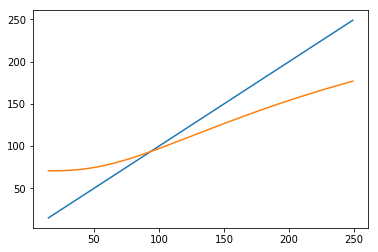

In [217]:
t = np.arange(15.0, 250.0, 1.0)
plt.plot(t, t)
plt.plot(t, [62.8298142*np.exp(-213.585678*(np.log(2)/i))+25.5633968+235.796165*np.exp(-428.916673*(np.log(2)/i))+45.2188479 for i in t])

In [220]:
result = optimize.minimize(f, np.array([10.0]), method = 'Nelder-Mead')

In [221]:
result

 final_simplex: (array([[93.47442627],
       [93.4744873 ]]), array([8.41582869e-06, 1.89339386e-05]))
           fun: 8.41582868815749e-06
       message: 'Optimization terminated successfully.'
          nfev: 54
           nit: 27
        status: 0
       success: True
             x: array([93.47442627])

In [180]:
#### Results are:
dt_min = float(result['x'][0])

In [181]:
#calculate when 
gr_min = np.log(2)/dt_min
dt_h = dt_min/60.0
gr_h = np.log(2)/dt_h
measured_volume = -0.53*gr_h**2.0 + 2.41*gr_h + 1.62
print('Minimization (when C+D==tau) returned a doubling time of: '+str(dt_min))
print('Measured volume when C+D==tau: '+str(measured_volume))

#print(-0.53*dt_h**2.0 + 2.41*dt_h + 1.62)

Minimization (when C+D==tau) returned a doubling time of: 93.47444915771484
Measured volume when C+D==tau: 2.5873453927627095


In [ ]:
######################## weights and age_dist ###################

In [11]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [12]:
age_array = np.arange(0.0, 1.0, 0.001)
weights = {}
for i in age_array:
    weights[i] = integrate.quad(ageDistFunc, i, i+0.001)[0]

In [ ]:
#######################################################################
########################## plot the cell concentration dt_min #########
#######################################################################

In [ ]:
plt.plot(dt_min, [i['cell_concentration'] for i in results])
plt.plot(dt_min, [8.0*10.0**8.0]*len(dt_min))
plt.xlabel('Doubling Time (min)')
plt.ylabel('Cell Number * 10^8 * mL-1 * OD-1')

In [66]:
dt_min = np.arange(18.0, 250.0, 5.0)
results = []
for i in dt_min:
    results.append(popCellCount(i, age_array, weights)) 
    
upper_bound = go.Scatter(
    name='Upper Bound',
    x=dt_min,
    y=[i['cell_concentration']+i['std_cell_concentration'] for i in results],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

trace = go.Scatter(
    name='Measurement',
    x=dt_min,
    y=[i['cell_concentration'] for i in results],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

'''
trace1 = go.Scatter(
    name='Old Measurement',
    x=dt_min,
    y=[8.0*10.0**8.0]*len(dt_min),
    mode='lines',
    line=dict(color='rgb(242, 174, 15)'))
'''

trace1 = go.Scatter(
    name='Old Measurement',
    x=[58.0516142],
    y=[popCellCount(58.0516142, age_array, weights)['cell_concentration']],
    marker=dict(size=12, 
                color='#d62728',
                line=dict(width=2,
                    color='DarkSlateGrey'
                    )
                )
    )

lower_bound = go.Scatter(
    name='Lower Bound',
    x=dt_min,
    y=[i['cell_concentration']-i['std_cell_concentration'] for i in results],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines')

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound, trace1]

layout = go.Layout(
    xaxis=dict(title='Doubling Time (minutes)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Concentration',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

"""
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=58.0516142,
            y0=1.314709*10**8.0,
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            )
        ),
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=18,
            y0=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            ),
        ),
    ],
    """
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=72,
            y=0.77*10**9.0,
            xref="x",
            yref="y",
            text="(58.05, 0.8x10<sup>9</sup>)",
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)



iplot(fig, filename='pandas-continuous-error-bars')

In [67]:
plotly.io.write_image(fig,'dt_min_cell_conc_alt.png' , width=1200, height=800)

Text(0, 0.5, 'Cell Number * 10^8 * mL-1 * OD-1')

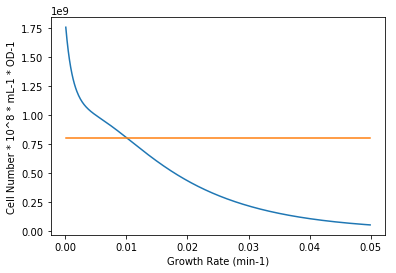

In [198]:
gr_min = np.arange(0.0001, 0.05, 0.0001)
plt.plot(gr_min, [popCellCount(i, age_array, weights) for i in gr_min])
plt.plot(gr_min, [8.0*10.0**8.0]*len(gr_min)) 
plt.xlabel('Growth Rate (min-1)')
plt.ylabel('Cell Number * 10^8 * mL-1 * OD-1')

In [73]:
dt_min = np.arange(0.0001, 0.03, 0.0001)
results = []
for i in dt_min:
    results.append(popCellCount(i, age_array, weights)) 
    
upper_bound = go.Scatter(
    name='Upper Bound',
    x=dt_min,
    y=[i['cell_concentration']+i['std_cell_concentration'] for i in results],
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

trace = go.Scatter(
    name='Measurement',
    x=dt_min,
    y=[i['cell_concentration'] for i in results],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

'''
trace1 = go.Scatter(
    name='Old Measurement',
    x=dt_min,
    y=[8.0*10.0**8.0]*len(dt_min),
    mode='lines',
    line=dict(color='rgb(242, 174, 15)'))
'''

trace1 = go.Scatter(
    name='Old Measurement',
    x=[np.log(2)/58.0516142],
    y=[popCellCount(np.log(2)/58.0516142, age_array, weights)['cell_concentration']],
    marker=dict(size=12, 
                color='#d62728',
                line=dict(width=2,
                    color='DarkSlateGrey'
                    )
                )
    )

lower_bound = go.Scatter(
    name='Lower Bound',
    x=dt_min,
    y=[i['cell_concentration']-i['std_cell_concentration'] for i in results],
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines')

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound, trace1]

layout = go.Layout(
    xaxis=dict(title='Growth Rate (min<sup>-1</sup>)'),
    yaxis=dict(title='Cell Concentration (mL<sup>-1</sup> &#183; OD<sup>-1</sup>)', exponentformat = 'power'),
    title='Growth Rate Dependent Cell Concentration',
    showlegend = False,
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

"""
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=58.0516142,
            y0=1.314709*10**8.0,
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            )
        ),
        # Line Horizontal
        go.layout.Shape(
            type="line",
            x0=18,
            y0=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            x1=58.0516142,
            y1=popCellCount(58.0516142, age_array, weights)['cell_concentration'],
            line=dict(
                color="#d62728",
                width=2,
                dash="dashdot",
            ),
        ),
    ],
    """
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=np.log(2)/72,
            y=0.77*10**9.0,
            xref="x",
            yref="y",
            text="({0:.4f}, 0.8x10<sup>9</sup>)".format(np.log(2)/58.05),
            showarrow=False,
            arrowhead=0,
            ax=0,
            ay=0,
            font=dict(
                color="#d62728"
            )
        )
    ]
)



iplot(fig, filename='pandas-continuous-error-bars')

In [74]:
plotly.io.write_image(fig,'gr_min_cell_conc_alt.png' , width=1200, height=800)

In [6]:
###########################################################################################
######### Optimise to estimate the GR when the authors measured 8.0*10**8 cells per mL ####
###########################################################################################

In [8]:
def ageDistFunc(a):
 return 2.0*np.log(2.0)*np.exp(-a*np.log(2))

In [9]:
age_array = np.arange(0.0, 1.0, 0.001)
weights = {}
for i in age_array:
    weights[i] = integrate.quad(ageDistFunc, i, i+0.001)[0]

In [11]:
from scipy import optimize
def f(x):
    if x<=0.0:
        return 9999.0
    else:
        res = popCellCount(x, age_array, weights)
        return np.abs((8.0*10.0**8.0)-(res['cell_concentration']))

In [12]:
result = optimize.minimize(f, np.array([60.0]), method = 'Nelder-Mead')

In [13]:
result

 final_simplex: (array([[58.0516142],
       [58.0516142]]), array([0.00015819, 0.00025356]))
           fun: 0.00015819072723388672
       message: 'Optimization terminated successfully.'
          nfev: 76
           nit: 38
        status: 0
       success: True
             x: array([58.0516142])